In [31]:
#Importing Libraries
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [9]:
df= pd.read_csv("tele_churn.csv")

In [10]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [11]:
df.drop("Unnamed: 0", axis= 1, inplace= True)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [12]:
x= df.drop("Churn", axis= 1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [13]:
y= df["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Train Test Split

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.2)

# Decision Tree Classifier

In [15]:
model_dt= DecisionTreeClassifier(criterion= "gini", random_state= 100, max_depth= 6, min_samples_leaf= 8)

In [16]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [17]:
y_pred= model_dt.predict(x_test)

In [18]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
model_dt.score(x_test, y_test)

0.8017057569296375

In [23]:
print(classification_report(y_test, y_pred, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1027
           1       0.68      0.49      0.57       380

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [26]:
sm= SMOTEENN()
x_resampled, y_resampled= sm.fit_resample(x,y)

In [27]:
xr_train, xr_test, yr_train, yr_test= train_test_split(x_resampled, y_resampled, test_size= 0.2)

In [28]:
model_dt_smote= DecisionTreeClassifier(criterion= "gini", random_state= 100, max_depth= 6, min_samples_leaf= 8)

In [30]:
model_dt_smote.fit(xr_train, yr_train)
yr_pred= model_dt_smote.predict(xr_test)
model_score_r= model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_pred))

0.9317988064791134
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       533
           1       0.94      0.94      0.94       640

    accuracy                           0.93      1173
   macro avg       0.93      0.93      0.93      1173
weighted avg       0.93      0.93      0.93      1173



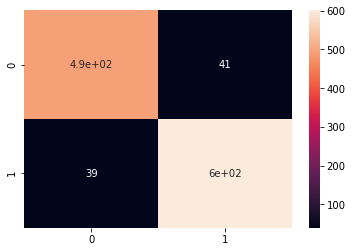

In [39]:
sns.heatmap(metrics.confusion_matrix(yr_test, yr_pred), annot= True);

Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model_rf= RandomForestClassifier(n_estimators= 100, criterion= "gini", random_state= 100, max_depth= 6, min_samples_leaf= 8)

In [44]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [46]:
y_pred= model_rf.predict(x_test)

In [48]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
model_rf.score(x_test, y_test)

0.8045486851457001

In [51]:
print(classification_report(y_test, y_pred, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1027
           1       0.73      0.43      0.55       380

    accuracy                           0.80      1407
   macro avg       0.78      0.69      0.71      1407
weighted avg       0.80      0.80      0.79      1407



In [55]:
sm= SMOTEENN()
x_resampled1, y_resampled1= sm.fit_resample(x,y)

In [56]:
xr_train1, xr_test1, yr_train1, yr_test1= train_test_split(x_resampled1, y_resampled1, test_size= 0.2)

In [57]:
model_rf_smote= RandomForestClassifier(n_estimators= 100, criterion= "gini", random_state= 100, max_depth= 6, min_samples_leaf= 8)

In [58]:
model_rf_smote= model_rf.fit(xr_train1, yr_train1)

In [59]:
model_rf_smote.fit(xr_train1, yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
yr_pred1= model_rf_smote.predict(xr_test1)

In [62]:
model_score_r1= model_rf_smote.score(xr_test1, yr_test1)

In [66]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_pred1))

0.9387402933563417
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       520
           1       0.93      0.96      0.95       639

    accuracy                           0.94      1159
   macro avg       0.94      0.94      0.94      1159
weighted avg       0.94      0.94      0.94      1159



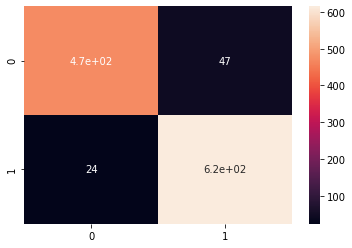

In [69]:
sns.heatmap(metrics.confusion_matrix(yr_test1, yr_pred1), annot= True);

# Performing PCA

In [70]:
from sklearn.decomposition import PCA
pca= PCA(0.9)
xr_train_pca= pca.fit_transform(xr_train1)
xr_test_pca= pca.transform(xr_test1)
explained_variance= pca.explained_variance_ratio_

In [71]:
model= RandomForestClassifier(n_estimators= 100, max_depth= 6, random_state= 100, criterion= "gini", min_samples_leaf= 8)

In [72]:
model.fit(xr_train_pca, yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [73]:
yr_predict_pca= model.predict(xr_test_pca)

In [74]:
model_score_r_pca= model.score(xr_test_pca, yr_test1)

In [81]:
print(model_score_r)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.9317988064791134
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       520
           1       0.73      0.84      0.78       639

    accuracy                           0.74      1159
   macro avg       0.74      0.73      0.73      1159
weighted avg       0.74      0.74      0.74      1159

